### At this stage, we will review the data loaded from the dataset, analyze it, put it into a convenient form for use and evaluate what needs to be taken into account when further working with the data.

In [71]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
import plotly.express as px

In [72]:
data_filename = 'data/family_data.csv'
df = pd.read_csv(data_filename)
df.head()

,family_id,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
0,0,52,38,12,82,33,75,64,76,10,28,4
1,1,26,4,82,5,11,47,38,6,66,61,4
2,2,100,54,25,12,27,82,10,89,80,33,3
3,3,2,95,1,96,32,6,40,31,9,59,2
4,4,53,1,47,93,26,3,46,16,42,39,4


In [73]:
data_filename = 'data/family_data.csv'
with open(data_filename) as f:
    reader = csv.DictReader(f)
    family_dict = list(reader)

family_dict[0]

{'family_id': '0',
 'choice_0': '52',
 'choice_1': '38',
 'choice_2': '12',
 'choice_3': '82',
 'choice_4': '33',
 'choice_5': '75',
 'choice_6': '64',
 'choice_7': '76',
 'choice_8': '10',
 'choice_9': '28',
 'n_people': '4'}

### For further work it will be much more convenient to use an ordered list of desired dates, rather than each time accessing the dictionary by the key 'choice_i'

In [74]:
family_dataset = []
for family in family_dict:
  family_data = dict()
  family_data['id'] = int(family['family_id'])
  family_data['n_members'] = int(family['n_people'])
  choise_list = []
  for i in range(10):
    choise_list.append(int(family['choice_' + str(i)]))
  family_data['dates'] = choise_list
  family_dataset.append(family_data)
family_dataset[0]


{'id': 0, 'n_members': 4, 'dates': [52, 38, 12, 82, 33, 75, 64, 76, 10, 28]}

First, let's check how many families and with what number of members are present in the dataset. Let's determine the total number of visitors.

In [75]:
num_of_members = dict()
for family in family_dataset:
  if family['n_members'] in num_of_members.keys() :
    num_of_members[family['n_members']] += 1
  else:
    num_of_members[family['n_members']] = 1

summa = 0
for k, v in sorted(num_of_members.items()):
  print("Families with",  k, "members:", v)
  summa += v * k
print()
print("Total number of visitors:", summa)

Families with 2 members: 717
Families with 3 members: 981
Families with 4 members: 1451
Families with 5 members: 899
Families with 6 members: 494
Families with 7 members: 301
Families with 8 members: 157

Total number of visitors: 21003


### For more convenient handling of the list, we will organize it.
 We create 2 lists sorted by the number of family members. The first one - in ascending order, the second one - in descending order.

In [76]:

ascending_family_data = sorted(family_dataset, key=lambda d: d['n_members'])
print(ascending_family_data[716])
print(ascending_family_data[717])
print(ascending_family_data[1698])
print(ascending_family_data[3149])
print(ascending_family_data[4049])
print(ascending_family_data[4543])
print(ascending_family_data[4842])
print(ascending_family_data[4843])
print()

family_data = sorted(family_dataset, key=lambda d: d['n_members'], reverse=True)
print(family_data[156])
print(family_data[157])
print(family_data[458])
print(family_data[952])
print(family_data[1851])
print(family_data[3302])
print(family_data[4282])
print(family_data[4283])
print()

{'id': 4996, 'n_members': 2, 'dates': [88, 66, 20, 17, 26, 54, 81, 91, 59, 48]}
{'id': 2, 'n_members': 3, 'dates': [100, 54, 25, 12, 27, 82, 10, 89, 80, 33]}
{'id': 0, 'n_members': 4, 'dates': [52, 38, 12, 82, 33, 75, 64, 76, 10, 28]}
{'id': 7, 'n_members': 5, 'dates': [25, 11, 52, 48, 10, 17, 88, 50, 95, 66]}
{'id': 20, 'n_members': 6, 'dates': [3, 88, 17, 68, 32, 73, 25, 1, 59, 74]}
{'id': 10, 'n_members': 7, 'dates': [96, 92, 8, 5, 67, 12, 57, 34, 80, 46]}
{'id': 4993, 'n_members': 7, 'dates': [62, 1, 89, 66, 28, 60, 81, 40, 88, 13]}
{'id': 41, 'n_members': 8, 'dates': [31, 5, 92, 45, 35, 59, 32, 17, 14, 66]}

{'id': 4990, 'n_members': 8, 'dates': [47, 61, 74, 12, 80, 46, 32, 94, 4, 19]}
{'id': 9, 'n_members': 7, 'dates': [1, 88, 39, 50, 26, 18, 96, 47, 46, 28]}
{'id': 12, 'n_members': 6, 'dates': [52, 98, 53, 1, 39, 67, 87, 24, 65, 95]}
{'id': 7, 'n_members': 5, 'dates': [25, 11, 52, 48, 10, 17, 88, 50, 95, 66]}
{'id': 0, 'n_members': 4, 'dates': [52, 38, 12, 82, 33, 75, 64, 76, 10

### Number of families selecting each day (by priority)

The data is prepared. Let's start the analysis by identifying the most popular days for visiting. A graph of the number of people wishing to visit Santa is plotted. Lines of different colors indicate the family priority number. Analyzing the graph, we notice:
1. Some days have a particularly low value of possible visitors
2. The graph has a decreasing trend with distance from Christmas.
The second sign is quite understandable - visiting Santa is more popular as Christmas approaches, which means that the lower the number, the more people want to.
Let's figure out why the first conclusion arose.

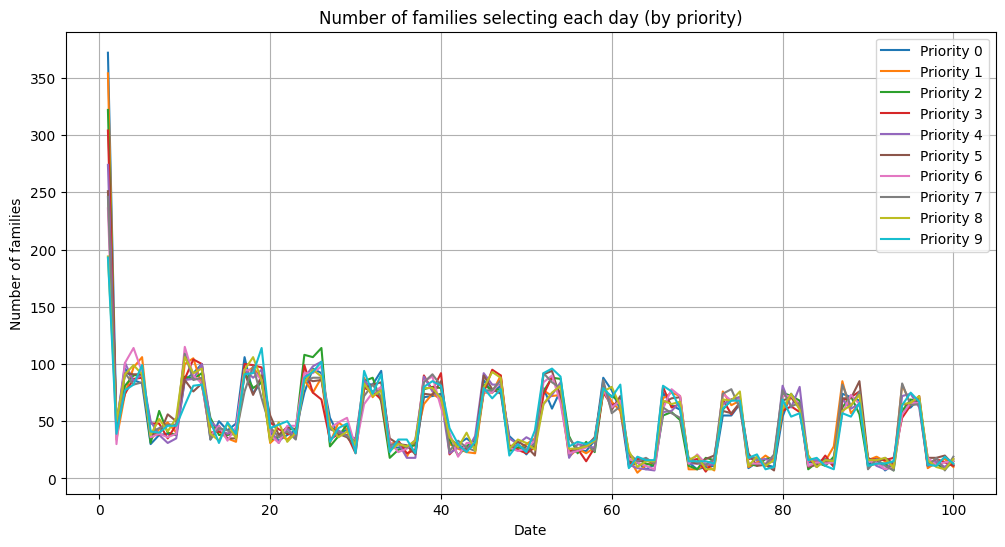

In [77]:
priority_counts = defaultdict(lambda: defaultdict(int))

for family in family_dataset:
    for priority, date in enumerate(family['dates']):
        priority_counts[priority][date] += 1

plt.figure(figsize=(12, 6))
colors = sns.color_palette("tab10", 10)

for priority in range(10):
    dates = sorted(priority_counts[priority].keys())
    counts = [priority_counts[priority][date] for date in dates]
    plt.plot(dates, counts, label=f'Priority {priority}', color=colors[priority])

plt.xlabel("Date")
plt.ylabel("Number of families")
plt.title("Number of families selecting each day (by priority)")
plt.legend()
plt.grid(True)
plt.show()


### Number of people selecting a day (by priority) - On 10 different graphs

For a more thorough analysis, we will build a separate graph for each priority.
From the graph we see that every four days the popularity decreases, and then rises again for the next 3 days. The most likely reason is the days of the week. From Monday to Thursday the popularity decreases, since most adults work. And from Friday to Sunday - it increases sharply

In [78]:
priority_counts = defaultdict(lambda: defaultdict(int))

for family in family_dataset:
    for priority, date in enumerate(family['dates']):
        priority_counts[priority][date] += family['n_members']

data = []
for priority in range(10):
    for date, count in priority_counts[priority].items():
        data.append({"priority": f"Priority {priority}", "date": date, "count": count})

df = pd.DataFrame(data)

fig1 = px.bar(df,
              x="date",
              y="count",
              animation_frame="priority",
              title="Number of people selecting a day (by priority)",
              labels={"date": "Date", "count": "Number of people", "priority": "Priority"},
              template="plotly_dark",
              color_discrete_sequence=["lightblue"])

fig1.update_layout(xaxis_title="Date", yaxis_title="Number of people", title_font_size=20, font=dict(size=14))
fig1.show()


### Number of people selecting a date as first priority

Now let's estimate what will happen if each family visits its first priority. From the graph we see that some days will significantly exceed the maximum number of visitors (especially on Christmas Eve). In this case, the greedy algorithm comes to mind, because it seems, the larger the size of the family that has to be put on its further priority - the more money Santa will have to spend.

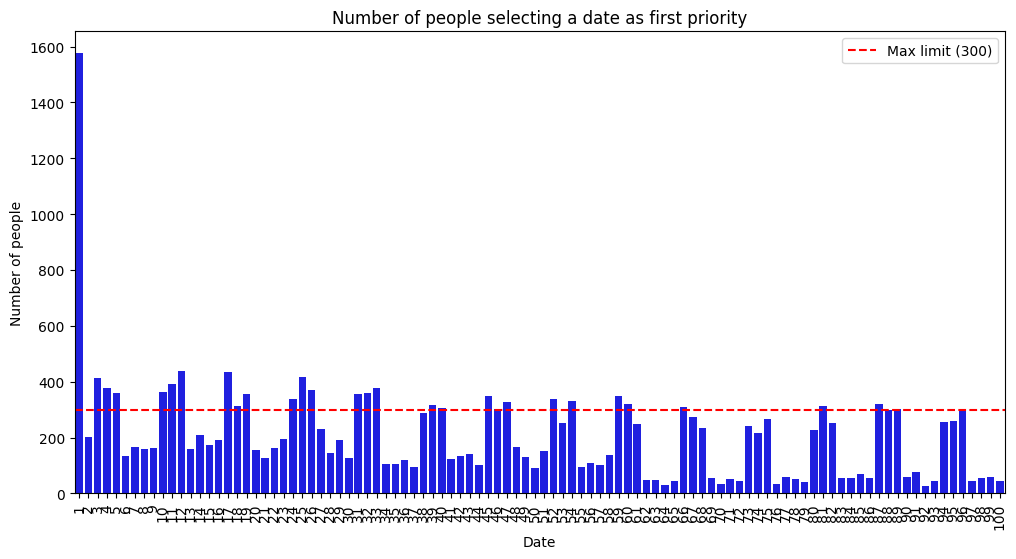

In [79]:
import pandas as pd

first_choice_counts = defaultdict(int)

for family in family_dataset:
    date = family['dates'][0]
    first_choice_counts[date] += family['n_members']

df_first_choice = pd.DataFrame(list(first_choice_counts.items()), columns=['Date', 'Number of people'])
df_first_choice = df_first_choice.sort_values('Date')

plt.figure(figsize=(12, 6))
sns.barplot(x=df_first_choice['Date'], y=df_first_choice['Number of people'], color='b')

plt.axhline(y=300, color='r', linestyle='--', label="Max limit (300)")
plt.xlabel("Date")
plt.ylabel("Number of people")
plt.title("Number of people selecting a date as first priority")
plt.legend()
plt.xticks(rotation=90)
plt.show()


Let's try to take into account the first priority of the 8-member family. We see that this is possible, then we try to fit 7-member families

In [80]:
priority_1_counts_8 = defaultdict(int)
priority_1_counts_7_8 = defaultdict(int)

for family in family_dataset:
    if family["n_members"] == 8:
        priority_1_counts_8[family["dates"][0]] += family["n_members"]
    if family["n_members"] in [7, 8]:
        priority_1_counts_7_8[family["dates"][0]] += family["n_members"]

df_priority_8 = pd.DataFrame(list(priority_1_counts_8.items()), columns=["Date", "Number of people (8 members)"])
df_priority_7_8 = pd.DataFrame(list(priority_1_counts_7_8.items()), columns=["Date", "Number of people (7-8 members)"])

df_merged = pd.merge(df_priority_8, df_priority_7_8, on="Date", how="outer").fillna(0)
df_merged = df_merged.sort_values("Date")

fig2 = px.bar(df_priority_8,
              x="Date",
              y="Number of people (8 members)",
              title="People distribution by day (first priority, 8-member families)",
              labels={"Number of people (8 members)": "Number of people"},
              template="plotly_dark",
              color_discrete_sequence=["lightblue"])

fig2.update_layout(xaxis_title="Date", yaxis_title="Number of people", title_font_size=20, font=dict(size=14))
fig2.show()

fig3 = px.bar(df_priority_7_8,
              x="Date",
              y="Number of people (7-8 members)",
              title="People distribution by day (first priority, 7-8 member families)",
              labels={"Number of people (7-8 members)": "Number of people"},
              template="plotly_dark",
              color_discrete_sequence=["orange"])

fig3.update_layout(xaxis_title="Date", yaxis_title="Number of people", title_font_size=20, font=dict(size=14))
fig3.show()


Before using the greedy algorithm, let's make sure that prioritizing families with a large number of members is more profitable.

In [81]:
print("The cost of choosing priority 1 for 4 2-member families is:", 50 * 4)
print("For 8-member family:", 50)
print()
print("The cost of choosing priority 2 for 4 2-member families is:", 50 * 4 + 9 * 4 * 2)
print("For 8-member family:", 50 + 9*8)
print()
print("The cost of choosing priority 3 for 4 2-member families is:", 100 * 4 + 9 * 4 * 2)
print("For 8-member family:", 100 + 9*8)
print()
print("The cost of choosing priority 4 for 4 2-member families is:", (200 + 9 * 2) * 4)
print("For 8-member family:", 200 + 9*8)
print()
print("The cost of choosing priority 5 for 4 2-member families is:", (200 + 18 * 2) * 4)
print("For 8-member family:", 200 + 18*8)
print()
print("The cost of choosing priority 6 for 4 2-member families is:", (300 + 18 * 2) * 4)
print("For 8-member family:", 300 + 18*8)
print()
print("The cost of choosing priority 7 for 4 2-member families is:", (300 + 36 * 2) * 4)
print("For 8-member family:", 300 + 36*8)
print()
print("The cost of choosing priority 8 for 4 2-member families is:", (400 + 36 * 2) * 4)
print("For 8-member family:", 400 + 36*8)
print()
print("The cost of choosing priority 9 for 4 2-member families is:", (500 + 235 * 2) * 4)
print("For 8-member family:", 500 + 235*8)
print()
print("The cost of choosing priority 10 for 4 2-member families is:", (500 + 434 * 2) * 4)
print("For 8-member family:", 500 + 434*8)

The cost of choosing priority 1 for 4 2-member families is: 200
For 8-member family: 50

The cost of choosing priority 2 for 4 2-member families is: 272
For 8-member family: 122

The cost of choosing priority 3 for 4 2-member families is: 472
For 8-member family: 172

The cost of choosing priority 4 for 4 2-member families is: 872
For 8-member family: 272

The cost of choosing priority 5 for 4 2-member families is: 944
For 8-member family: 344

The cost of choosing priority 6 for 4 2-member families is: 1344
For 8-member family: 444

The cost of choosing priority 7 for 4 2-member families is: 1488
For 8-member family: 588

The cost of choosing priority 8 for 4 2-member families is: 1888
For 8-member family: 688

The cost of choosing priority 9 for 4 2-member families is: 3880
For 8-member family: 2380

The cost of choosing priority 10 for 4 2-member families is: 5472
For 8-member family: 3972


We managed to prove that the more members there are in a family, the more profitable it is to take their wishes into account. Let's try to apply a greedy algorithm. The result will be displayed on the graph

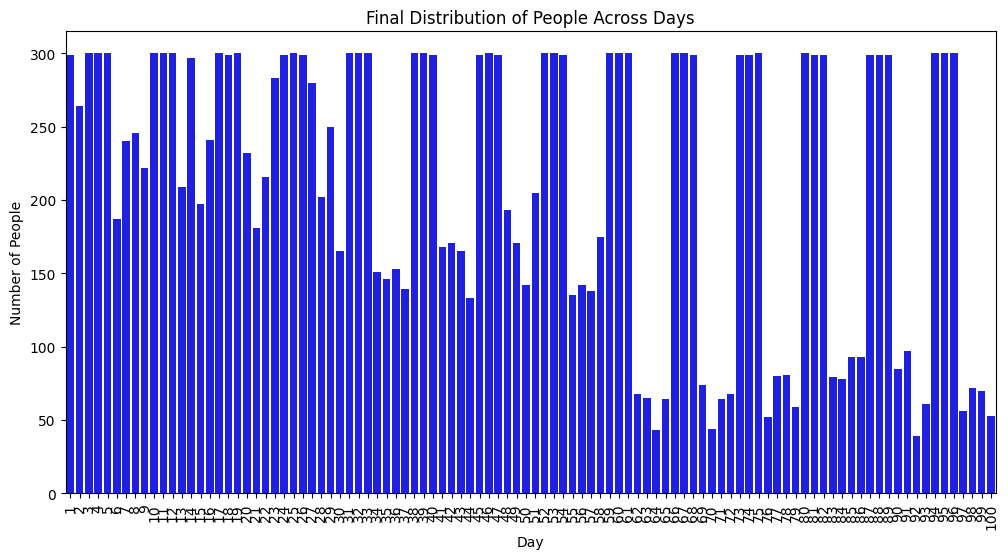

In [82]:
day_capacity = defaultdict(int)  # Stores the number of people assigned to each day
schedule = defaultdict(list)  # Stores assigned families per day

for family in family_data:
    family_size = family['n_members']
    for day in family['dates']:
        if day_capacity[day] + family_size <= 300:
            day_capacity[day] += family_size
            schedule[day].append(family['id'])
            break

days = sorted(day_capacity.keys())
people_counts = [day_capacity[day] for day in days]

plt.figure(figsize=(12, 6))
sns.barplot(x=days, y=people_counts, color='b')
plt.xlabel("Day")
plt.ylabel("Number of People")
plt.title("Final Distribution of People Across Days")
plt.xticks(rotation=90)
plt.show()


However, we must further take into account the value of the Penalty function.

$$P = \sum_{d=100}^{1} \frac{(N_d - 125)}{400} N_d^{\left(\frac{1}{2} + \frac{|N_d - N_{d+1}|}{50} \right)}$$



In [83]:
# Compute penalties based on the given formula
penalty = 0
days_sorted = sorted(day_capacity.keys())

for i, day in enumerate(days_sorted):
    Nd = day_capacity[day]
    Nd_next = day_capacity[days_sorted[i+1]] if i < len(days_sorted) - 1 else Nd  # Handle last day case

    term = ((Nd - 125) / 400) * (Nd ** (1/2 + abs(Nd - Nd_next) / 50))
    penalty += term

print(f"Total Penalty: {penalty}")


Total Penalty: 28230908478465.86
